In [ ]:
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
#from jupyterthemes import jtplot #for styling matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [8]:
train_data # 0 label = Positive Tweet and 1 label = Negative Tweet


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
train_data.shape

(31962, 3)

In [11]:
train_data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [12]:
train_data = train_data.drop('id', axis = 1)

In [13]:
train_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


EXPLORING THE DATASET

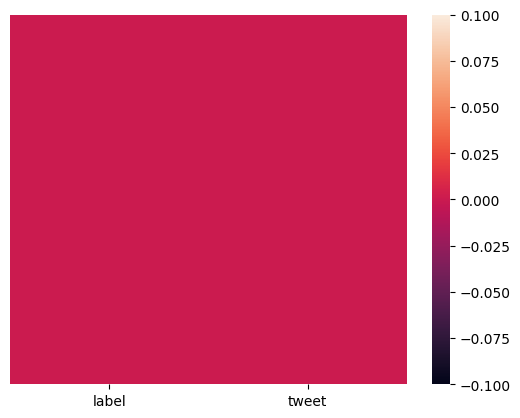

In [14]:
sns.heatmap(train_data.isnull(), yticklabels = False)
plt.show()

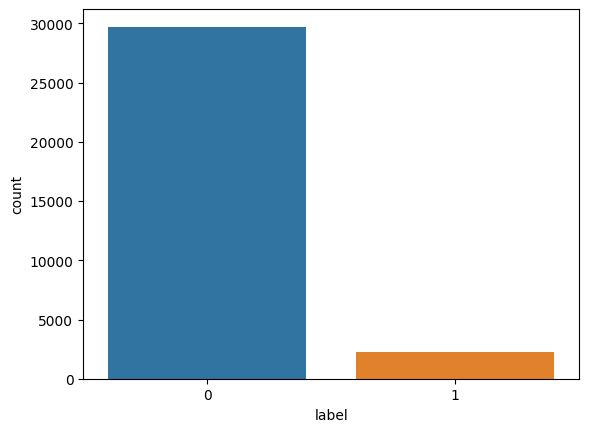

In [15]:
sns.countplot(x = train_data['label'])
plt.show()

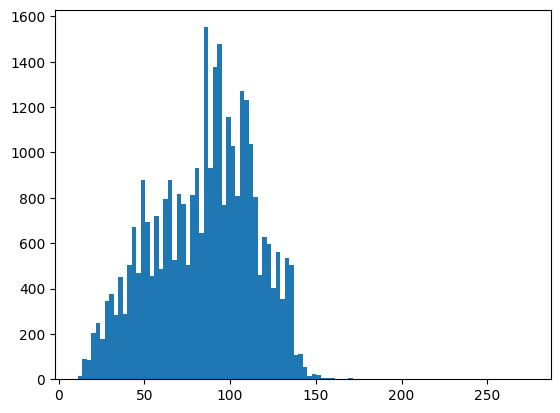

In [16]:
length = list()
for i in range(len(train_data)):
    length.append(len(train_data.iloc[i,1]))
train_data['length'] = length
plt.hist(train_data['length'], bins = 100)
plt.show()

In [17]:
negative = train_data[train_data['label'] == 1]

In [ ]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


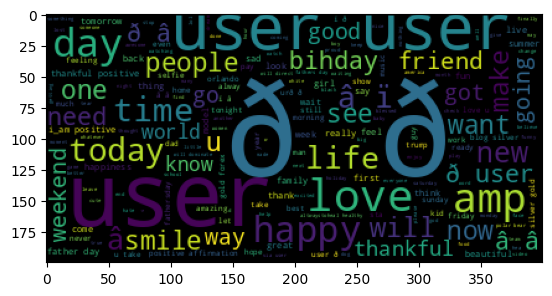

In [18]:
from wordcloud import WordCloud
sentences = train_data['tweet'].tolist()
combined_sentences = " ".join(sentences)
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

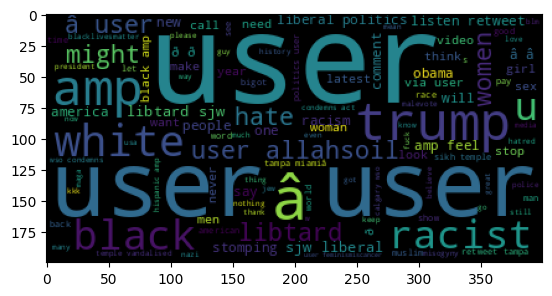

In [19]:
negative_sentences = negative['tweet'].tolist()
combined_negative_sentences = " ".join(negative_sentences)
plt.imshow(WordCloud().generate(combined_negative_sentences))
plt.show()

In [20]:
import string
string.punctuation
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
st = stopwords.words('english')
st.append("and")
Test = "Goblin and Ninja FoR the win!!"
test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
test_punc_removed = ''.join(test_punc_removed)        


In [22]:
test_punc_removed

'Goblin and Ninja FoR the win'

In [23]:
test_punc_st_removed = []
for char in test_punc_removed.split():
    if char.lower() not in st:
        test_punc_st_removed.append(char)
test_punc_st_removed = " ".join(test_punc_st_removed)  

In [24]:
test_punc_st_removed

'Goblin Ninja win'

## TOKENIZATION


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ["This is my first paper", "This is the second document", "here is the third thi one"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
vectorizer.get_feature_names_out()

array(['document', 'first', 'here', 'is', 'my', 'one', 'paper', 'second',
       'the', 'thi', 'third', 'this'], dtype=object)

In [26]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed

In [27]:
train_data_clean = train_data['tweet'].apply(message_cleaning)
train_data['tweet'][5]

train_data_clean[5]

data = train_data_clean.tolist()
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()
tweets_countvectorizer.shape

X = tweets_countvectorizer
y = train_data['label']

## NAIVE-BAYES ALGORITHM

In [28]:
X.shape


(31962, 43671)

In [29]:
y.shape

(31962,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
from sklearn.naive_bayes import MultinomialNB 
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

In [ ]:
y_pred = NB_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

In [ ]:
print(classification_report(y_test, y_pred))